In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.
A look at the data

Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:\
player - name of the player\
pos - the position of the player\
g - number of games the player was in\
gs - number of games the player started\
pts - total points the player scored\
There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them. We can read our dataset in and figure out which columns are present:\
import pandas\
with open("nba_2013.csv", 'r') as csvfile:\
nba = pandas.read_csv(csvfile)

## Load the libraries and the dataset

In [1]:
import pandas as pd 
import numpy as np
with open("nba_2013.csv", 'r') as csvfile:
    df = pd.read_csv(csvfile)

df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [2]:
print(df.shape)
print(df.columns)

(481, 31)
Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')


In [3]:
df.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [4]:
df[["player", "pos", "bref_team_id", "season"]].head()

,player,pos,bref_team_id,season
0,Quincy Acy,SF,TOT,2013-2014
1,Steven Adams,C,OKC,2013-2014
2,Jeff Adrien,PF,TOT,2013-2014
3,Arron Afflalo,SG,ORL,2013-2014
4,Alexis Ajinca,C,NOP,2013-2014


In [5]:
df.drop(labels=["player","pos","bref_team_id","season"], axis=1, inplace=True)#no need for these columns
print(df.shape)

(481, 27)


In [6]:
y=df.pts
X=df.copy()
X.drop(labels=["pts"], axis=1, inplace=True)

#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(336, 26)
(145, 26)
(336,)
(145,)


## Feature Engineering-Taking care of missing values

##### Train Dataset

In [8]:
features_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, X_train[feature].isnull().sum())

x3p. 46
ft. 14


In [9]:
X_train["x3p."].fillna(X_train["x3p."].mean(),inplace=True)
X_train["ft."].fillna(X_train["ft."].mean(),inplace=True)

c:\users\allyson\anaconda3\envs\practice\lib\site-packages\pandas\core\series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
features_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, X_train[feature].isnull().sum())

##### Test Dataset

In [11]:
features_nan=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, X_test[feature].isnull().sum())

fg. 2
x3p. 21
x2p. 3
efg. 2
ft. 6


In [12]:
X_test["fg."].fillna(X_test["fg."].mean(),inplace=True)
X_test["x3p."].fillna(X_test["x3p."].mean(),inplace=True)
X_test["x2p."].fillna(X_test["x2p."].mean(),inplace=True)
X_test["efg."].fillna(X_test["efg."].mean(),inplace=True)
X_test["ft."].fillna(X_test["ft."].mean(),inplace=True)

In [13]:
features_nan=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, X_test[feature].isnull().sum())

----------------------------------------------------------------------------

In [14]:
y_train=y_train.values
y_test=y_test.values

X_train=X_train.values
X_test=X_test.values

## Model Training

In [16]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score

# check for increasing neighbour values to see which has the highest regression score
# Note: higher k values leads to Overfitting so we check here till k=25

for k in range(25):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    print (f"Regression score is {round(metrics.r2_score(y_test, y_pred)*100,3)} for k_value = {k_value}")

Regression score is 87.112 for k_value = 1
Regression score is 92.697 for k_value = 2
Regression score is 95.034 for k_value = 3
Regression score is 95.394 for k_value = 4
Regression score is 95.508 for k_value = 5
Regression score is 95.919 for k_value = 6
Regression score is 95.649 for k_value = 7
Regression score is 95.933 for k_value = 8
Regression score is 95.757 for k_value = 9
Regression score is 95.671 for k_value = 10
Regression score is 95.629 for k_value = 11
Regression score is 95.536 for k_value = 12
Regression score is 95.361 for k_value = 13
Regression score is 95.343 for k_value = 14
Regression score is 95.191 for k_value = 15
Regression score is 95.311 for k_value = 16
Regression score is 95.197 for k_value = 17
Regression score is 95.302 for k_value = 18
Regression score is 95.211 for k_value = 19
Regression score is 95.045 for k_value = 20
Regression score is 94.72 for k_value = 21
Regression score is 94.512 for k_value = 22
Regression score is 94.352 for k_value = 2

**Regression score is 95.933 for k_value = 8**

KNN r2 Score on Training set is 96.19
KNN r2 Score on Test Set is 95.93
[0.94631349 0.93407569 0.94822705 0.93248731 0.97113494]
Accuracy: 94.64 %
Standard Deviation: 1.39 %
Mean Absolute Error: 61.9698275862069
Mean Squared Error: 7787.933943965517
RMSE: 88.24927163419264


c:\users\allyson\anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


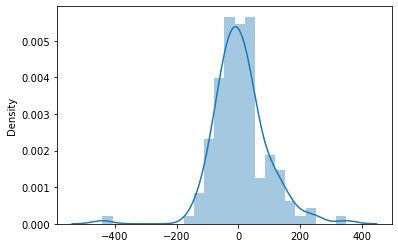

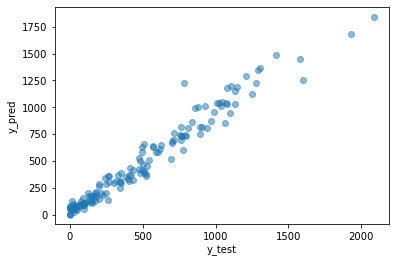

In [18]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

print("KNN r2 Score on Training set is",round(knn.score(X_train, y_train)*100,2))
print("KNN r2 Score on Test Set is",round(knn.score(X_test, y_test)*100,2))

accuracies = cross_val_score(knn, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [19]:
test_vs_pred = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})
test_vs_pred

,Actual Points,Predicted Points
0,436,414.875
1,717,699.125
2,1096,946.875
3,19,65.750
4,988,959.375
...,...,...
140,1107,1193.250
141,35,89.125
142,810,804.000
143,796,729.000
